### Importing Libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

### Data Splitting

In [2]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

### Data Visualization

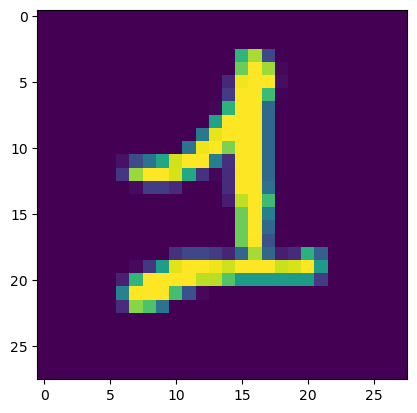

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[24])

In [8]:
x_train= x_train/255
x_test= x_test/255

### Model Building

In [9]:
model = Sequential()
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Training

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'Adam')

In [18]:
history= model.fit(x_train, y_train, epochs= 10, validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0133 - val_loss: 0.1124
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0129 - val_loss: 0.1111
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0098 - val_loss: 0.1062
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0092 - val_loss: 0.1164
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0061 - val_loss: 0.1086
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0084 - val_loss: 0.1187
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0068 - val_loss: 0.1192
Epoch 8/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0046 - val_loss: 0.1255
Epoch 9/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0072 - val_loss: 0.1370
Epoch 10/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.004

In [19]:
y_prob= model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_pred= y_prob.argmax(axis=1)

### Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9771

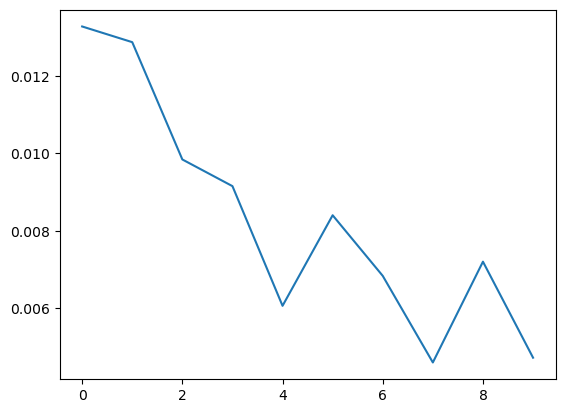

In [25]:
plt.plot(history.history['loss'])


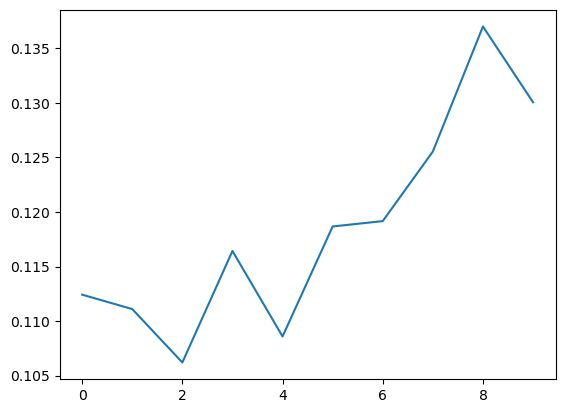

In [26]:
plt.plot(history.history['val_loss'])